In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from skimage import transform
import numpy as np
import cv2 as cv
import time

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
def post_process(img):
  img = tf.clip_by_value(img, 0, 255)
  img = img.numpy()
  img = tf.squeeze(img)
  img = img.numpy()
  img = img.astype(int)
  return img

In [3]:
def get_image(img_path, img_size=False):
  img = load_img(img_path)
  img = img_to_array(img, dtype=np.float32)
  if img_size != False:
    img = resize_img(img, img_size)
  return img

In [4]:
mosaic = tf.keras.models.load_model("/kaggle/input/style-transfer-model/mosaic/mosaic/saved_models")
mosaic_style_high = tf.keras.models.load_model("/kaggle/input/style-transfer-model/mosaic_style_weight_4e2/mosaic_style_weight_4e2/saved_models")
mosaic_style_low = tf.keras.models.load_model("/kaggle/input/style-transfer-model/mosaic_style_weight_4e0/mosaic_style_weight_4e0/saved_models")
mosaic_content_high = tf.keras.models.load_model("/kaggle/input/style-transfer-model/mosaic_content_weight_2e0/mosaic_content_weight_2e0/saved_models")
mosaic_content_low = tf.keras.models.load_model("/kaggle/input/style-transfer-model/mosaic_content_weight_5e_1/mosaic_content_weight_5e_1/saved_models")
rain_princess = tf.keras.models.load_model("/kaggle/input/style-transfer-model/rain_princess/rain_princess/saved_models")
udnie = tf.keras.models.load_model("/kaggle/input/style-transfer-model/udnie/udnie/saved_models")
wave = tf.keras.models.load_model("/kaggle/input/style-transfer-model/wave/wave/saved_models")

In [5]:
img = get_image("/kaggle/input/style-transfer-dataset/content/cat.jpg")
img_tensor = tf.convert_to_tensor(img)
img_tensor = tf.expand_dims(img_tensor, 0)

In [6]:
res_mosaic = post_process(mosaic(img_tensor))
res_mosaic_style_high = post_process(mosaic_style_high(img_tensor))
res_mosaic_style_low = post_process(mosaic_style_low(img_tensor))
res_mosaic_content_high = post_process(mosaic_content_high(img_tensor))
res_mosaic_content_low = post_process(mosaic_content_low(img_tensor))
res_rain_princess = post_process(rain_princess(img_tensor))
res_udnie = post_process(udnie(img_tensor))
res_wave = post_process(wave(img_tensor))

Time: 0.03508758544921875s


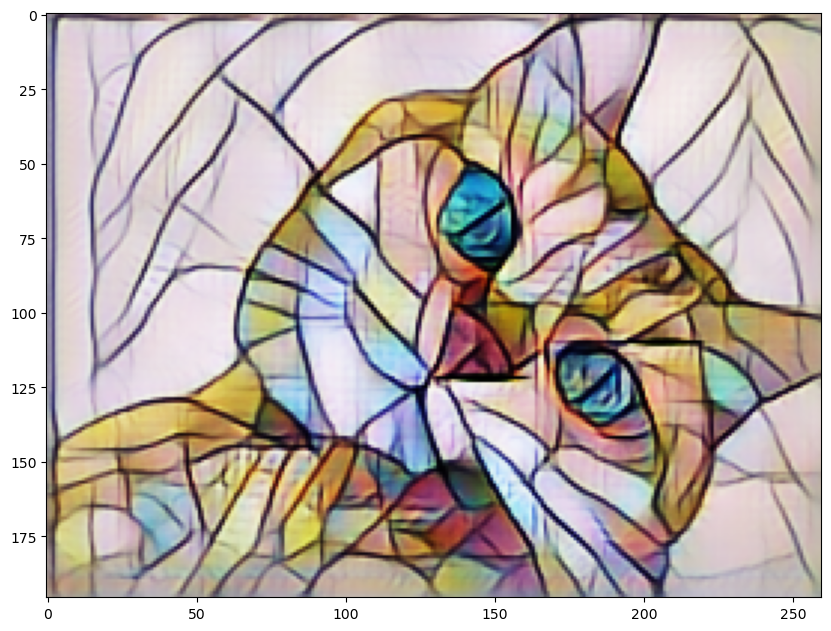

In [7]:
start = time.time()
plt.figure(1, (10,10))
plt.imshow(res_mosaic)
print(f"Time: {time.time() - start}s")

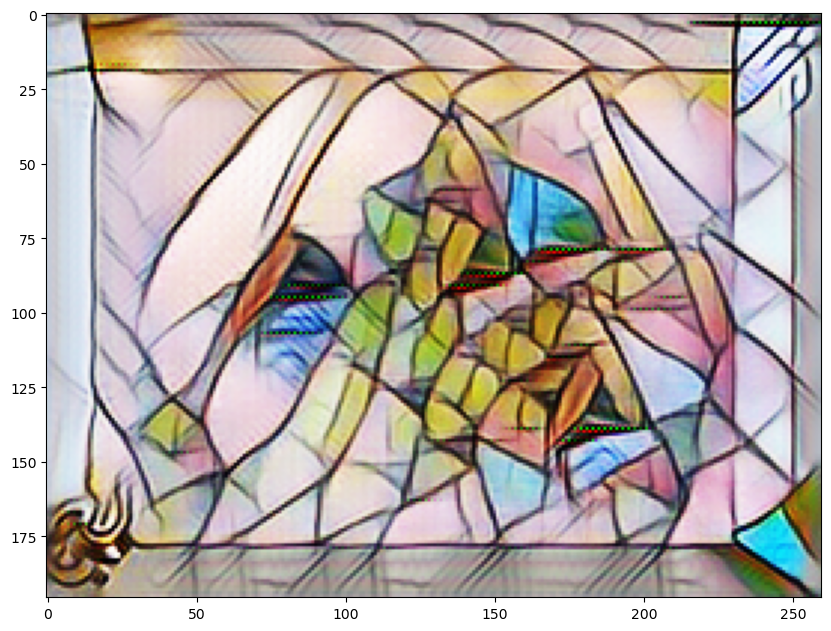

In [21]:
plt.figure(1, (10,10))
plt.imshow(res_mosaic_style_high)

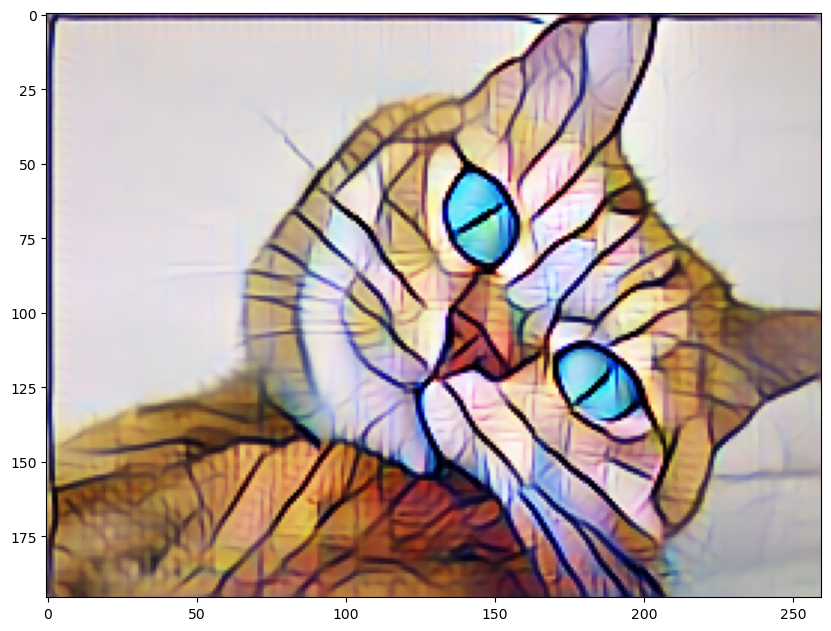

In [22]:
plt.figure(1, (10,10))
plt.imshow(res_mosaic_style_low)

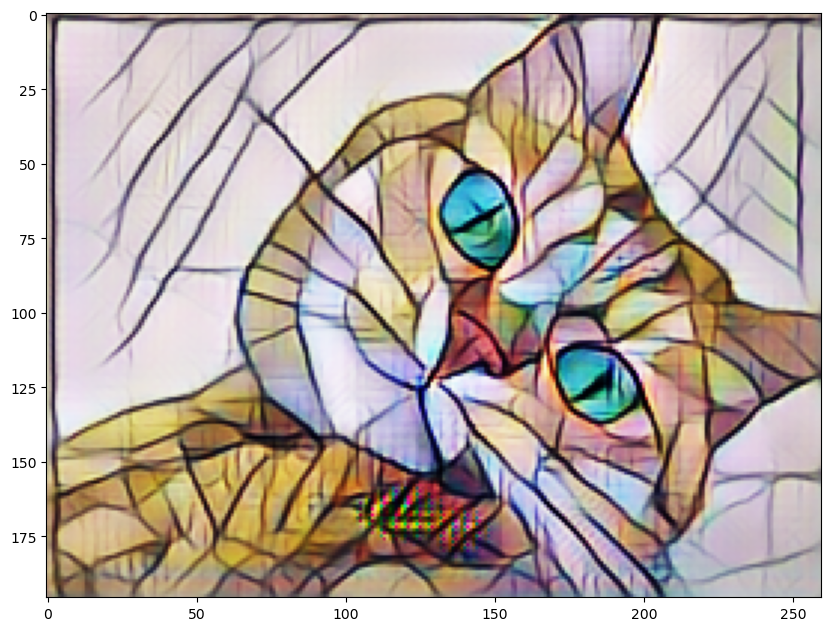

In [23]:
plt.figure(1, (10,10))
plt.imshow(res_mosaic_content_high)

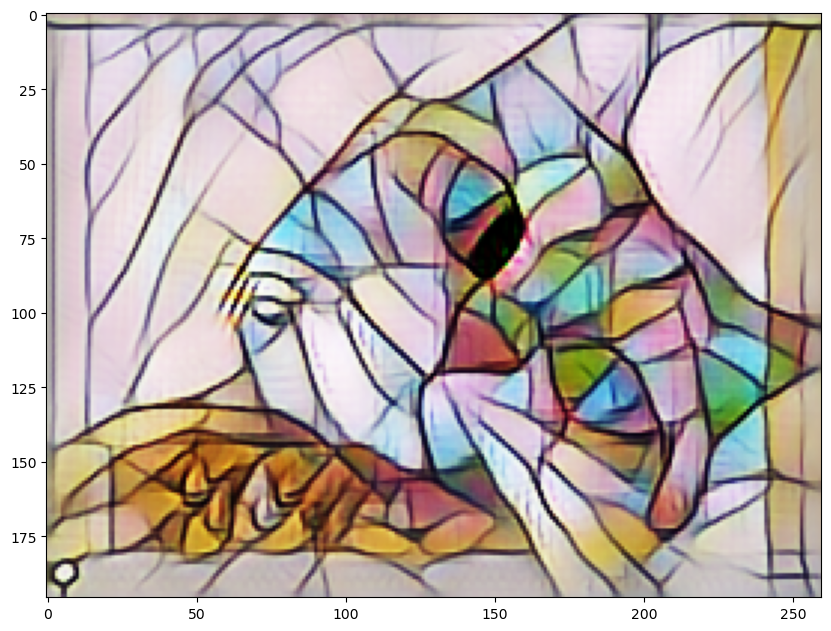

In [24]:
plt.figure(1, (10,10))
plt.imshow(res_mosaic_content_low)

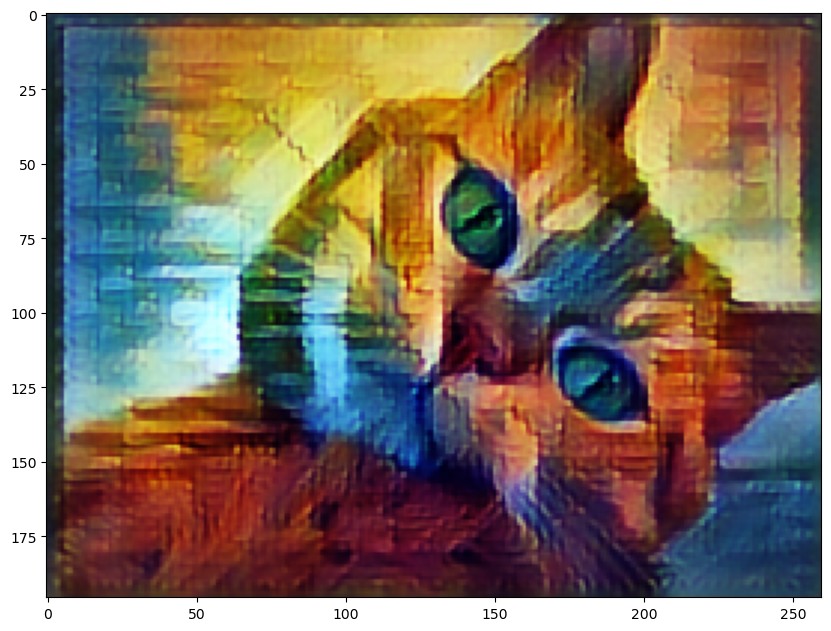

In [10]:
plt.figure(1, (10,10))
plt.imshow(res_rain_princess)

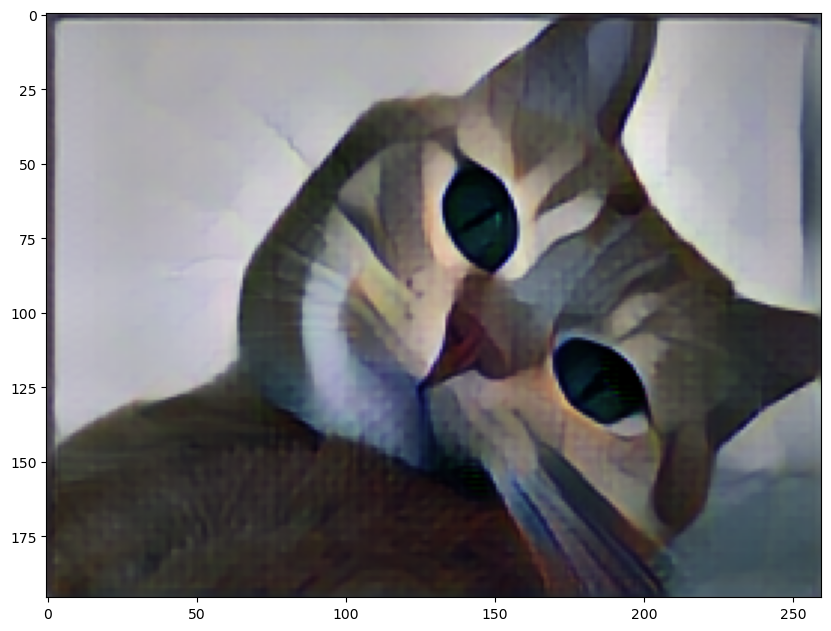

In [11]:
plt.figure(1, (10,10))
plt.imshow(res_udnie)

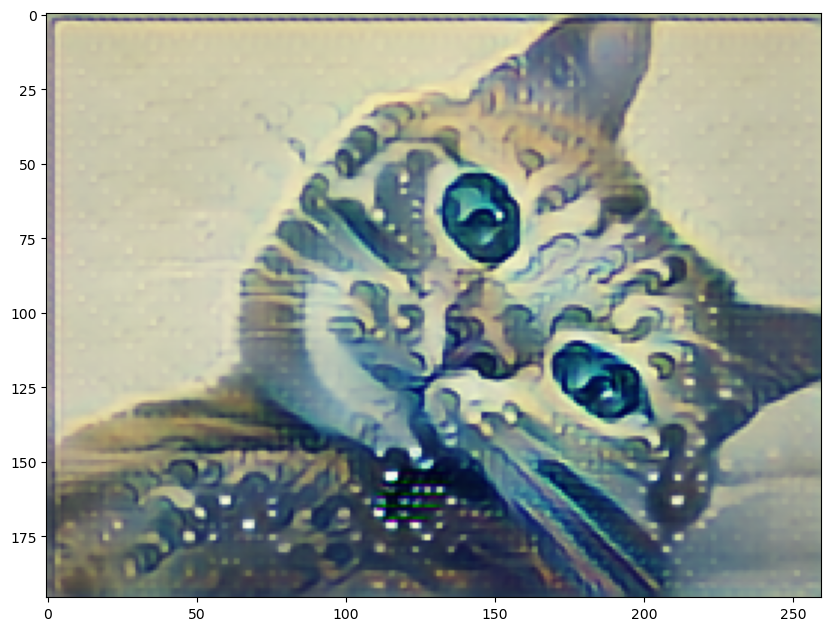

In [12]:
plt.figure(1, (10,10))
plt.imshow(res_wave)

In [2]:
def show_magnitude_spectrum(img_path):
    img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
    assert img is not None, "file could not be read, check with os.path.exists()"
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    plt.subplot(121),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()

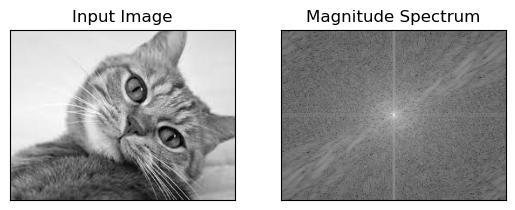

In [3]:
show_magnitude_spectrum('/kaggle/input/style-transfer-dataset/content/cat.jpg')